In [1]:
import numpy as np
from scipy import io as spio
from scipy import fftpack
from scipy import misc
from scipy import fftpack


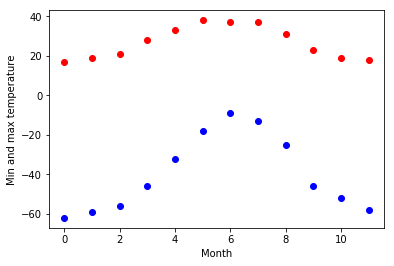

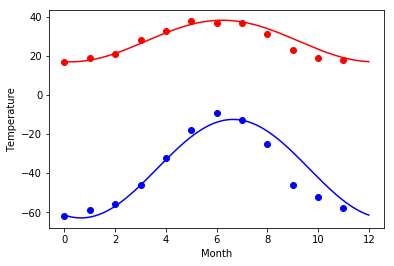

In [13]:
# Number 1

import numpy as np

maxim = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
minim = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, maxim, 'ro')
plt.plot(months, minim, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,maxim, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,minim, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, maxim, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, minim, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1


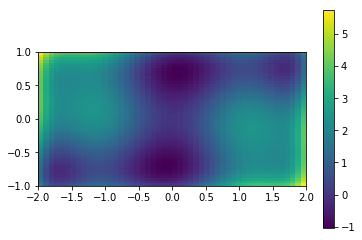

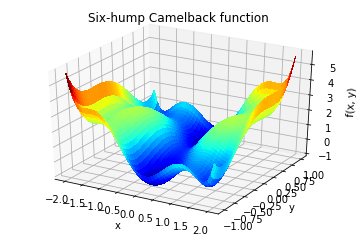

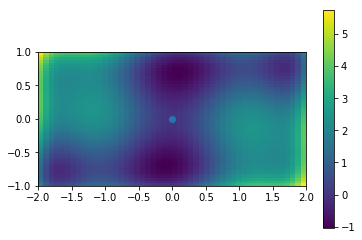

In [105]:
# Number 2

import numpy as np

def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

from scipy import optimize
x_min = optimize.fmin_bfgs(sixhump, [0, 0])

plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(x_min[0], x_min[1])

plt.show()



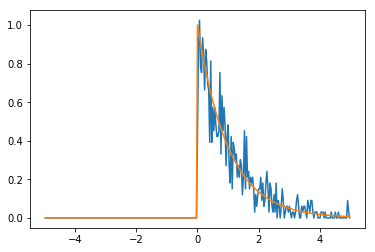

In [11]:
# Number 3

from scipy import stats
a=np.random.gamma(1,size=1000)
bins = np.linspace(-5, 5, 300)
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.gamma.pdf( bins,1 )
plt.plot(bins, histogram)
plt.plot(bins, b)

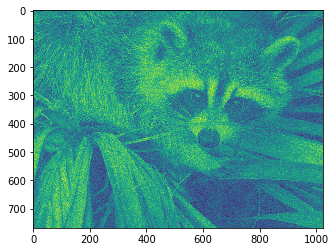

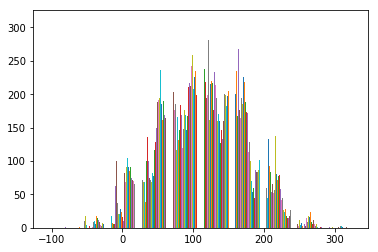

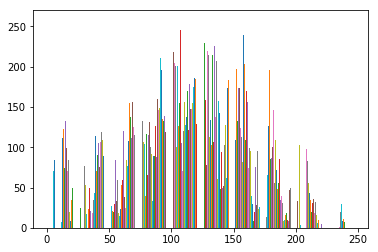

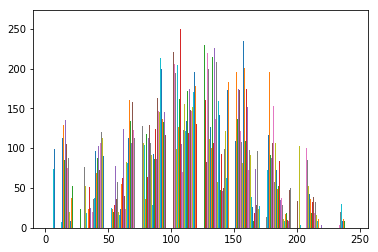

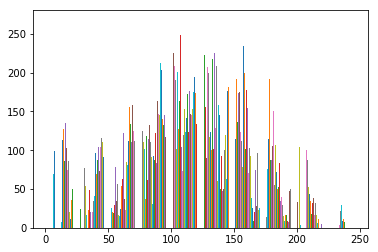

In [66]:
# Number 4

from scipy import misc
from scipy import ndimage
from scipy import signal
face = misc.face(gray = True)
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std()*0.5*np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(blurred_face, size=5)
wiener_face = signal.wiener(blurred_face, (5,5))
plt.imshow(noisy_face)
plt.figure()
plt.hist(noisy_face)
plt.figure()
plt.hist(blurred_face)
plt.figure()
plt.hist(median_face)
plt.figure()
plt.hist(wiener_face)
plt.show()

In [69]:
# Number 5

a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
b = ndimage.binary_erosion(a).astype(a.dtype)
ndimage.binary_dilation(b).astype(a.dtype)




array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [73]:
# Number 6

a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
initialarea=30*30
initialarea-np.sum(closed_mask) < 30*30

True

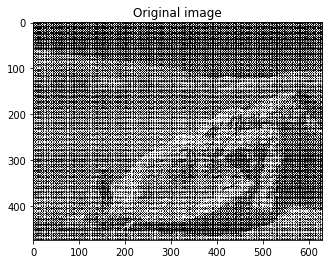

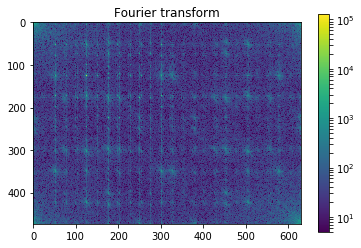

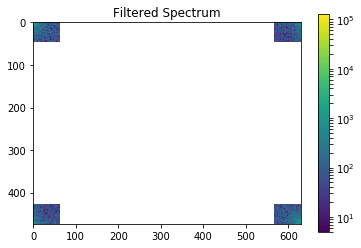

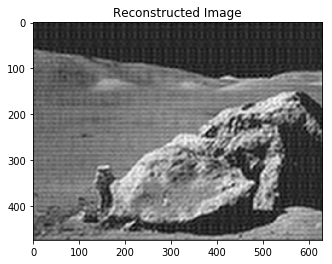

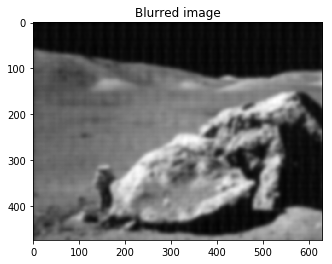

In [99]:
# Number 7

import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

from scipy import fftpack
im_fft = fftpack.fft2(im)

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()